In [2]:
#packages to be used\n"
import netCDF4 as nc
import os
import numpy.ma as ma
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feat
import matplotlib.gridspec as gridspec
import scipy
import datetime

In [4]:
#read the hurdat text file
hurricane_locations = []

with open('/Users/cjmasiel/desktop/HURDAT2.txt', 'r') as ds:
    lines_to_read = 0
    for line in ds:
        values = line.split(",")
        if lines_to_read == 0:
            lines_to_read = int(values[2])
        else:
            latitude, longitude = (values[4:6])
            hurricane_locations += [(latitude,longitude)]
            lines_to_read -=1 

In [5]:
lat = []
lon = []
for i in range(len(hurricane_locations)):
    latit = float(hurricane_locations[i][0][:-1])
    lat.append(latit)
    longi = -1*float(hurricane_locations[i][1][:-1])
    lon.append(longi)

In [6]:
import datetime
import time
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from netCDF4 import Dataset, num2date, date2num
import numpy as np
from scipy.ndimage import gaussian_filter
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import metpy.calc as mpcalc
import xlrd

In [7]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = '/Users/cjmasiel/Desktop/Cartopy/BG/'

In [17]:
def create_map_background():
    dataproj = ccrs.PlateCarree()
    fig=plt.figure(figsize=(25, 25))
    ax=plt.subplot(111, projection=dataproj)
    ax.set_extent([0, -110, 5, 60],ccrs.PlateCarree())
    ax.coastlines('50m', linewidth=1.5)
    ax.add_feature(cfeature.STATES, linewidth=1.0)
    ax.add_feature(cfeature.BORDERS, linewidth=1.0)
    gl = ax.gridlines(color='gray',alpha=0.5,draw_labels=True)
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 16}, {'fontsize': 16}
    gl.xlocator = mticker.FixedLocator([0,-10, -20,-30, -40,-50, -60,-70, -80,-90,-100,-110])
    gl.ylocator = mticker.FixedLocator([0, 10, 20, 30, 40, 50])
    gl.xformatter = LongitudeFormatter(zero_direction_label=True)
    gl.yformatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(gl.xformatter)
    ax.yaxis.set_major_formatter(gl.yformatter)
    ###############################################################################################
    ax.background_img(name='BM', resolution='high')
    ###############################################################################################
    plt.scatter(-180,-40,alpha = 1.0, color = '#5ebaff', label = 'Tropical Depression')
    plt.scatter(-180,-40,alpha = 1.0, color='#00faf4', label = 'Tropical Storm')
    plt.scatter(-180,-40,alpha = 1.0, color='#ffffcc', label = 'Category 1')
    plt.scatter(-180,-40,alpha = 1.0, color='#ffe775', label = 'Category 2')
    plt.scatter(-180,-40,alpha = 1.0, color='#ffc140', label = 'Category 3')
    plt.scatter(-180,-40,alpha = 1.0, color='#ff8f20', label = 'Category 4')
    plt.scatter(-180,-40,alpha = 1.0, color='#ff6060', label = 'Category 5')
    plt.scatter(-180,-40,alpha = 1.0, color='#5ebaff', marker  = 'v', label = 'Extra-Tropical')
    plt.scatter(-180,-40,alpha = 1.0, color='#00faf4', marker = 'v', label = 'Sub-Tropical Storm')
    plt.legend(loc = 'upper left')
    return fig, ax

In [18]:
Year_Storms = 1933

In [19]:
CODE = []

with open('/Users/cjmasiel/desktop/HURDAT2.txt', 'r') as ds:
    lines_to_read = 0
    for line in ds:
        values = line.split(",")
        if lines_to_read == 0:
            lines_to_read = int(values[2])
            year = float(values[0][4:8])
            if year == Year_Storms:
                code = values[0]
                CODE.append(code)
        else:
            lines_to_read -=1 

In [20]:
def plotstorm(x,y):
    Lat = []
    Long = []
    LatStorm = []
    LongStorm = []
    LatStorm1 = []
    LongStorm1 = []
    Lat1 = []
    Long1 = []
    Lat2 = []
    Long2 = []
    Lat3 = []
    Long3 = []
    Lat4 = []
    Long4 = []
    Lat5 = []
    Long5 = []
    LatSS = []
    LongSS = []
    LatEX = []
    LongEX = []

#Start looping through the text file
    with open('/Users/cjmasiel/desktop/HURDAT2.txt', 'r') as ds:
        lines_to_read = 0
        for line in ds:
            values = line.split(",")
            if lines_to_read == 0:
                lines_to_read = int(values[2])
                code = str(values[0])
            else:
                latitude  = float(values[4][:-1])
                longitude = -1 * float(values[5][:-1])
                vmax      = float(values[6])
                nature    = str(values[3])
                if code == x:
                    LatStorm1.append(latitude)
                    LongStorm1.append(longitude)
                    if vmax < 34 and nature in (' TD', ' TS', ' HU'):
                        Lat.append(latitude)
                        Long.append(longitude)
                    if 34 <= vmax < 63 and nature in (' TD', ' TS', ' HU'):
                        LatStorm.append(latitude)
                        LongStorm.append(longitude)
                    if 63 < vmax <= 83 and nature in (' TD', ' TS', ' HU'):
                        Lat1.append(latitude)
                        Long1.append(longitude)
                    if 83 < vmax <= 95 and nature in (' TD', ' TS', ' HU'):
                        Lat2.append(latitude)
                        Long2.append(longitude)
                    if 95 < vmax <= 112 and nature in (' TD', ' TS', ' HU'):
                        Lat3.append(latitude)
                        Long3.append(longitude)
                    if 112 < vmax <= 136 and nature in (' TD', ' TS', ' HU'):
                        Lat4.append(latitude)
                        Long4.append(longitude)
                    if vmax > 136 and nature in (' TD', ' TS', ' HU'):
                        Lat5.append(latitude)
                        Long5.append(longitude)
                    if nature in (' SS'):
                        LatSS.append(latitude)
                        LongSS.append(longitude)
                    if nature in (' EX',' LO',' WV',' SD',' DB'):
                        LatEX.append(latitude)
                        LongEX.append(longitude)  
                #After going through all these logical loops, now we read back one
                lines_to_read -=1 

    #Below is the plotting code \n",
    plt.plot(LongStorm1, LatStorm1, alpha = 1.0, color='grey', linewidth=1,zorder=1)
    plt.scatter(Long, Lat, color = '#5ebaff', label = 'Tropical Depression',zorder=2)
    plt.scatter(LongStorm,LatStorm, color='#00faf4', label = 'Tropical Storm',zorder=3)
    plt.scatter(Long1,Lat1,alpha = 1.0, color='#ffffcc', label = 'Category 1',zorder=4)
    plt.scatter(Long2,Lat2,alpha = 1.0, color='#ffe775', label = 'Category 2',zorder=5)
    plt.scatter(Long3,Lat3,alpha = 1.0, color='#ffc140', label = 'Category 3',zorder=6)
    plt.scatter(Long4,Lat4,alpha = 1.0, color='#ff8f20', label = 'Category 4',zorder=7)
    plt.scatter(Long5,Lat5,alpha = 1.0, color='#ff6060', label = 'Category 5',zorder=8)
    plt.scatter(LongEX,LatEX,alpha = 1.0, color='#5ebaff', marker  = 'v', label = 'Extra-Tropical',zorder=9)
    plt.scatter(LongSS,LatSS,alpha = 1.0, color='#00faf4', marker = 'v', label = 'Sub-Tropical Storm',zorder=10)

    plt.title(f'{y} North Atlantic Hurricane Season', loc = 'left')
    plt.title('Product by: Cameron Masiello', loc = 'right')

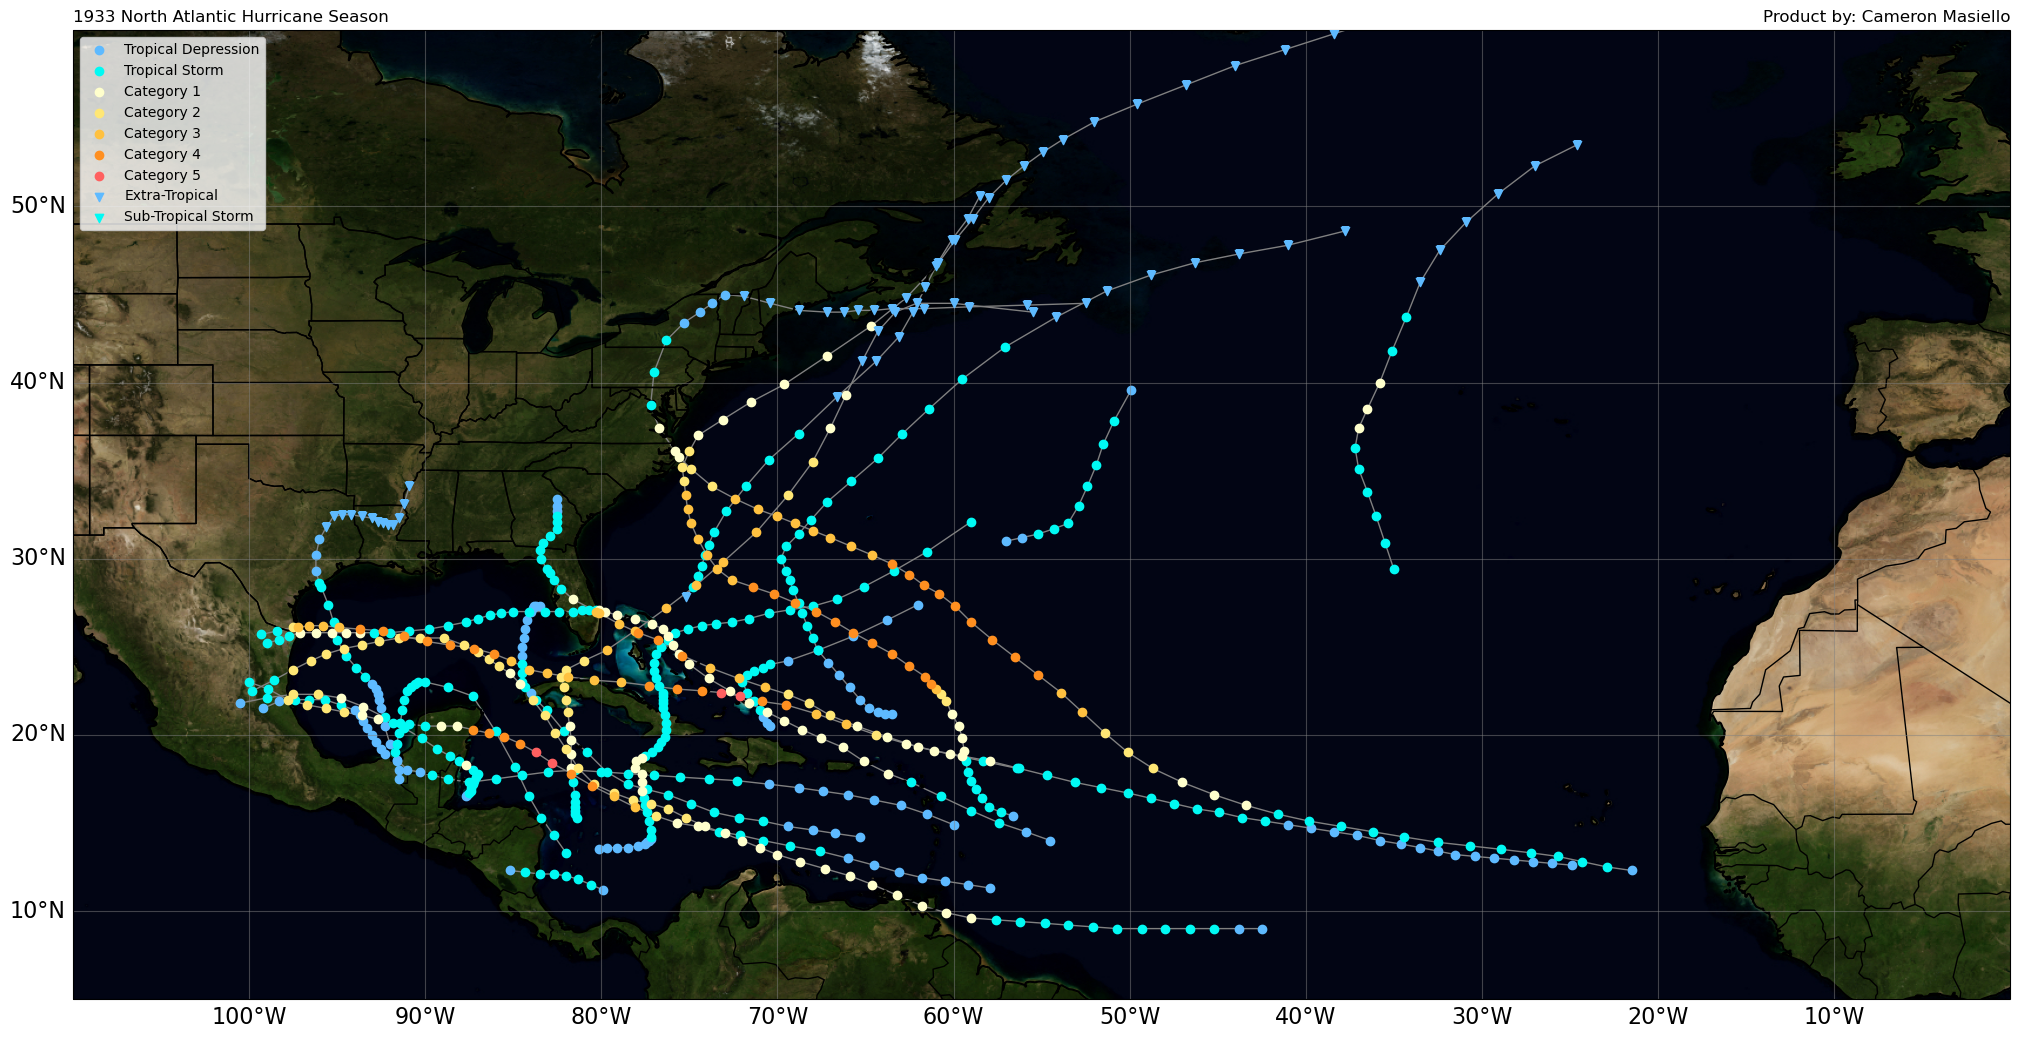

In [21]:
fig, ax = create_map_background()

for item in CODE:
    plotstorm(item, Year_Storms)

In [23]:
#Next, I want to look at the location of hurricanes and all Tropical Storms

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the base color as '#00faf4'
base_color = 'red'

# Define the number of steps in the color scale
num_steps = 15

# Create a linearly spaced array of alpha values from 0 to 1\n",
alphas = np.linspace(0, 1, num_steps)

# Create a list of colors with varying alpha values\n",
colors = [mcolors.to_rgba(base_color, alpha=a) for a in alphas]

# Create a color map using the list of colors
cmap_new = mcolors.ListedColormap(colors)

def RIdinsity(x,y,z):
    plt.title('Center Location of Hurricanes in the NATL (1980-2022)', {"fontsize": 16}, loc = 'left')
    plt.title(f'Product By: Cameron Masiello \n NUMBER OF CASES ={z}', {"fontsize": 12}, loc = 'Right')
    plot = plt.hist2d(x, y, bins=[list(range(-100, -10)), list(range(0, 50))], cmap=cmap_new)
    plt.clim(0,15)
    cbar = plt.colorbar(orientation = 'horizontal', pad = .05, shrink = 1, aspect = 50, extend = 'both')
    cbar.ax.set_xlabel('1 x 1 Degree Density', fontsize = 20)

In [24]:
#read the hurdat text file
hurricane_locations = []
CODE_Cat5 = []

with open('/Users/cjmasiel/desktop/HURDAT2.txt', 'r') as ds:
    lines_to_read = 0
    for line in ds:
        values = line.split(",")
        if lines_to_read == 0:
            lines_to_read = int(values[2])
            year = float(values[0][4:8])
            for i in range(1979,2023):
                if year == i:
                    code = values[0]
                    CODE_Cat5.append(code)
        else:
            lines_to_read -=1 

#print(CODE_Cat5)

In [25]:
Lat5 = []
Long5 = []

#Start looping through the text file
with open('/Users/cjmasiel/desktop/HURDAT2.txt', 'r') as ds:
    lines_to_read = 0
    for line in ds:
        values = line.split(",")
        if lines_to_read == 0:
            lines_to_read = int(values[2])
            code = str(values[0])
        else:
            latitude  = float(values[4][:-1])
            longitude = -1 * float(values[5][:-1])
            vmax      = float(values[6])
            nature    = str(values[3])
            for i in CODE_Cat5:
                if code == i:
                    if vmax > 63 and nature in (' TD', ' TS', ' HU'):
                    #if vmax > 136 and nature in (' TD', ' TS', ' HU'):
                        Lat5.append(latitude)
                        Long5.append(longitude)
            lines_to_read -=1 

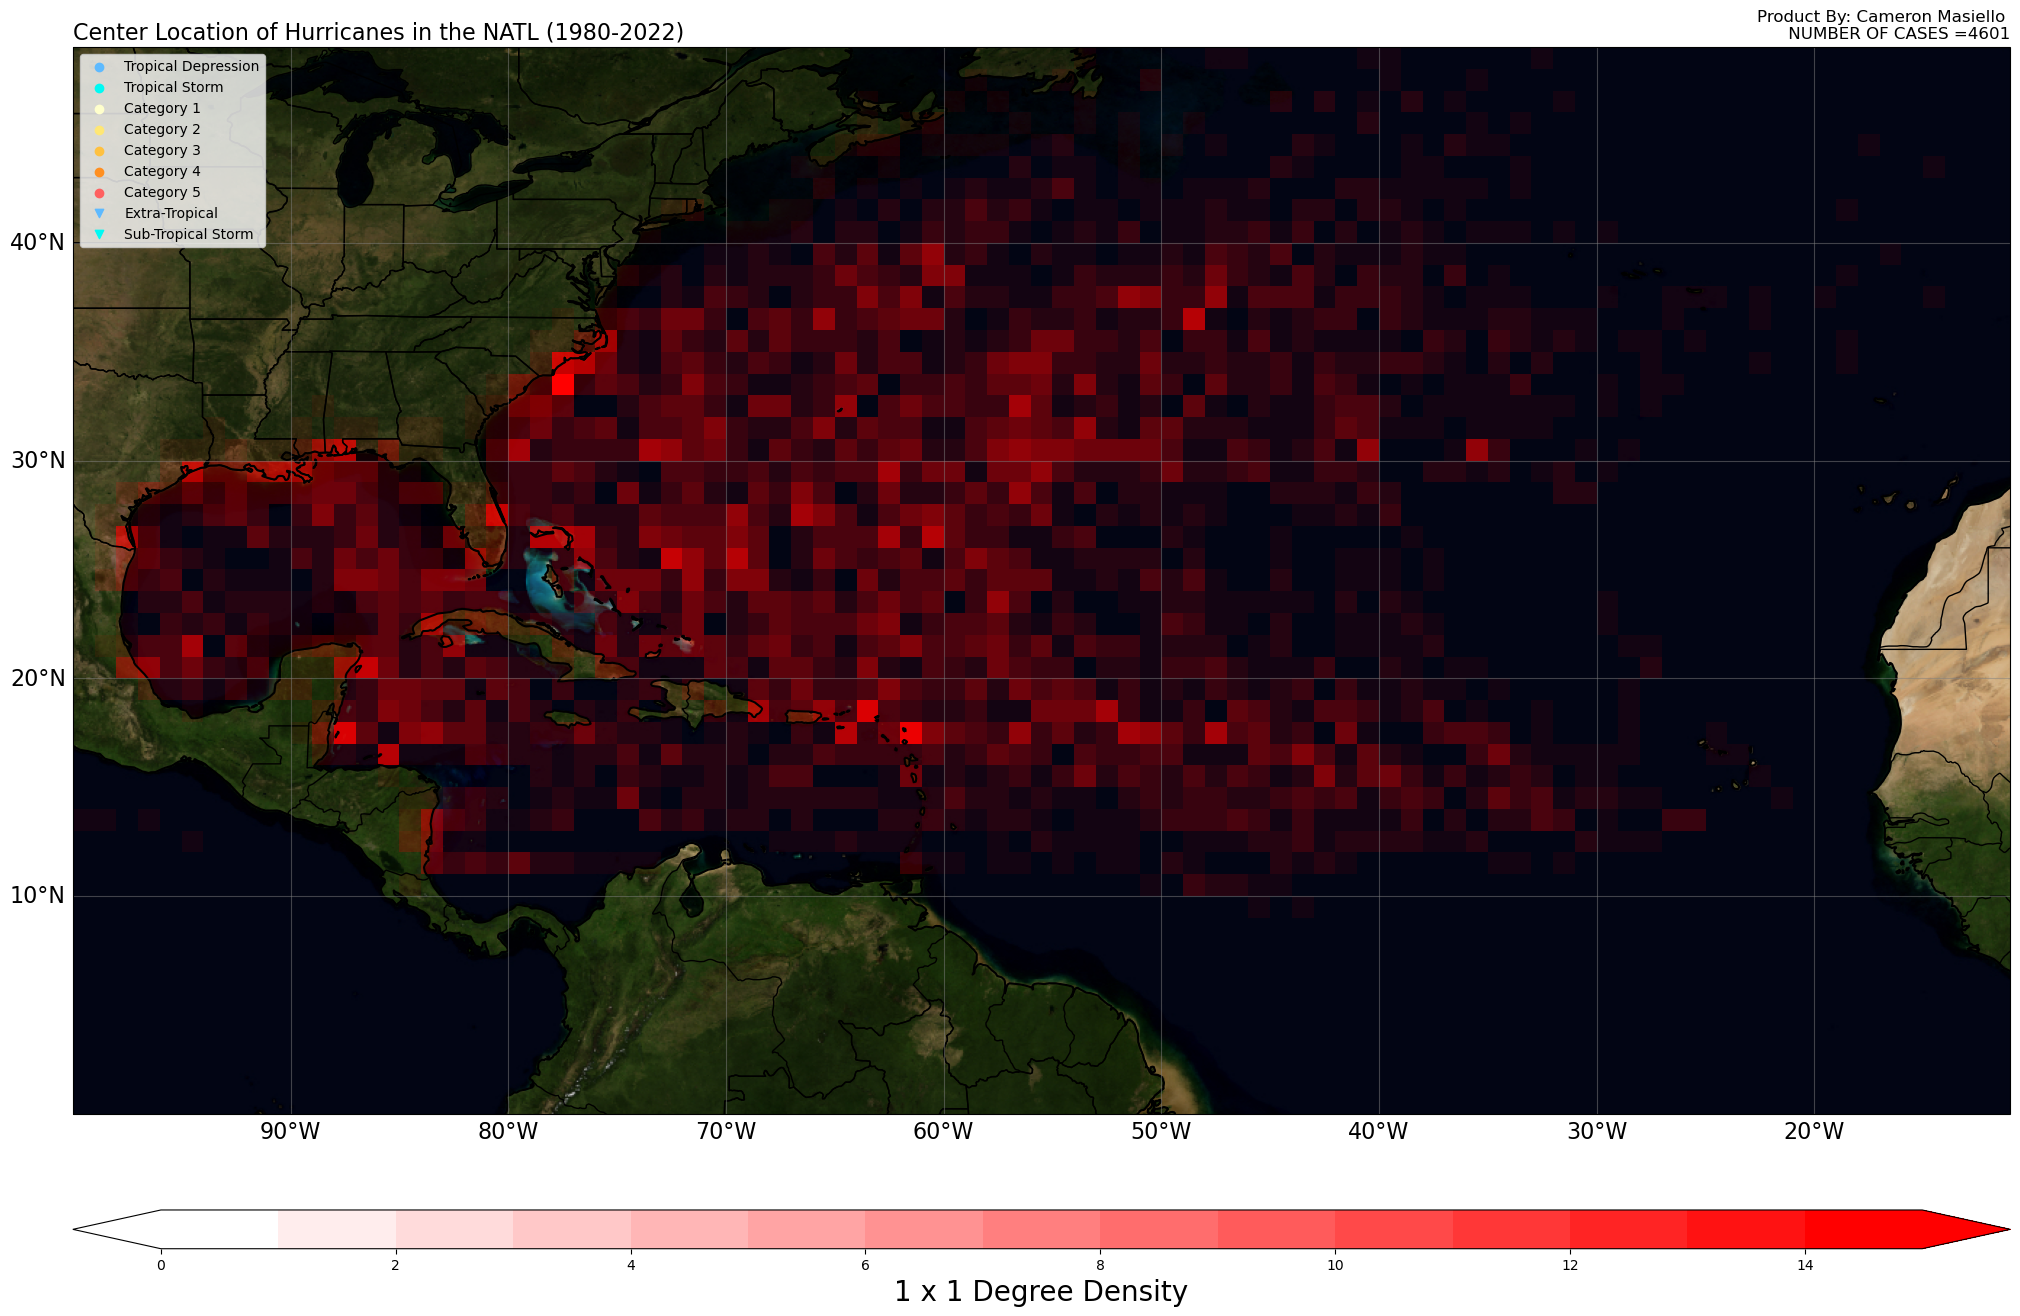

In [26]:
fig, ax = create_map_background()

RIdinsity(Long5,Lat5,len(Long5))